# 导入数据

In [1]:
ls

 驱动器 D 中的卷是 Work
 卷的序列号是 8CE5-3771

 D:\zhangli\Jupyter\自然语言处理\lesson2 的目录

2018/11/21  13:16    <DIR>          .
2018/11/21  13:16    <DIR>          ..
2018/11/21  13:16    <DIR>          .ipynb_checkpoints
2018/11/20  16:15    <DIR>          extracted
2018/11/19  09:50         8,046,785 lesson01-Part02.pdf
2018/11/21  13:16                72 lesson2_rework.ipynb
2018/11/21  12:51            33,129 lesson2_work.ipynb
2018/11/19  16:51            91,003 NLP Lunch Tutorial Smoothing.pdf
2018/11/20  18:09           139,554 The Good-Turing Estimate.pdf
2018/11/20  16:09           116,197 WikiExtractor.py
2018/11/20  16:10       272,417,714 zhwiki-20181101-pages-meta-history6.xml-p6186220p6348368.bz2
2018/11/19  09:43            48,783 第二课作业.pdf
               8 个文件    280,893,237 字节
               4 个目录 94,355,271,680 可用字节


In [7]:
all_content = open('extracted\\AA\\zh_wiki_00_std',encoding='utf8').read()

In [13]:
import re
def tokenize(string):
    return ''.join(re.findall('\w|\d',string))

In [14]:
ALL_CHARACTER = tokenize(all_content)

In [16]:
from collections import Counter

In [17]:
# 字符串转Counter，次数统计
all_character_counts = Counter(ALL_CHARACTER)

In [21]:
# 字符出现次数最多，最大次数
M = all_character_counts.most_common()[0][1]

In [24]:
import matplotlib.pyplot as plt

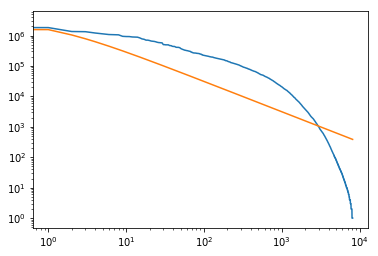

In [29]:
plt.xscale('log'),plt.yscale('log')
plt.plot([count for (word,count) in all_character_counts.most_common()])
plt.plot([M/i for i in range(1,len(all_character_counts)+1)])
plt.show()

# 概率计算

In [34]:
all_character_counts['的']

3134160

In [37]:
def get_probability_from_counts(counter):
    all_occurences = sum(counter.values())

    def get_prob(char):
        return counter[char] / all_occurences

    return get_prob


get_char_prob = get_probability_from_counts(all_character_counts)

In [38]:
get_char_prob('的')

0.024660361773115702

In [42]:
# 测试函数执行时间
import time
def func_running_time(func, args, times):
    start_time = time.time()
    for _ in range(times):
        func(args)
    end_time = time.time()
    print('{} used time is {}'.format(func.__name__, end_time-start_time))

func_running_time(get_char_prob, '的', 1000)

get_prob used time is 0.0


In [52]:
from functools import reduce
from operator import mul,add

In [53]:
# 计算多个字符串组合出现的概率
def prob_of_string(string):
    return reduce(mul, [get_char_prob(char) for char in string])

In [45]:
pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

In [81]:
def get_probability_prefromance(language_model_func,pairs):
    for string, string2 in pairs:
        print('*' * 10)
        print('\t\t {} with probability {}'.format(string,
                                                   language_model_func(tokenize(string))))
        print('\t\t {} with probability {}'.format(string2,
                                                   language_model_func(tokenize(string2))))

In [82]:
pairs = [pair, pair2, pair3]
get_probability_prefromance(prob_of_string,pairs)

**********
		 前天晚上吃晚饭的时候 with probability 8.771038831322834e-32
		 前天晚上吃早饭的时候 with probability 9.250258946794701e-32
**********
		 正是一个好看的小猫 with probability 1.9852577935766478e-26
		 真是一个好看的小猫 with probability 8.11619237895417e-27
**********
		 我无言以对，简直 with probability 1.8501983245042487e-22
		 我简直无言以对 with probability 1.8501983245042484e-22


# 2_Gram

In [76]:
def character_counts(string, n_gram=1):
#     字符串和划分长度，返回每个词的计数
    return Counter(string[i:i+n_gram] for i in range(len(string)-n_gram+1))

two_gram_counts = character_counts(ALL_CHARACTER, 2)

get_pair_prob = get_probability_from_counts(two_gram_counts)

def get_2_gram_prob(word, prev):
    if get_pair_prob(word+prev)>0:
        return get_pair_prob(word+prev)/get_char_prob(prev)
    else:
        return get_char_prob(word)

In [79]:
def get_2_gram_string_prob(string):
    probabilities = []
    for i in range(len(string)):
        if i==0:
            probabilities.append(get_2_gram_prob(string[i],'<s>'))
        else:
            probabilities.append(get_2_gram_prob(string[i],string[i-1]))
    return reduce(mul,probabilities)

In [84]:
get_probability_prefromance(prob_of_string, pairs)

**********
		 前天晚上吃晚饭的时候 with probability 8.771038831322834e-32
		 前天晚上吃早饭的时候 with probability 9.250258946794701e-32
**********
		 正是一个好看的小猫 with probability 1.9852577935766478e-26
		 真是一个好看的小猫 with probability 8.11619237895417e-27
**********
		 我无言以对，简直 with probability 1.8501983245042487e-22
		 我简直无言以对 with probability 1.8501983245042484e-22


In [83]:
get_probability_prefromance(get_2_gram_string_prob,pairs)

**********
		 前天晚上吃晚饭的时候 with probability 9.694973440754624e-35
		 前天晚上吃早饭的时候 with probability 4.488234883839959e-34
**********
		 正是一个好看的小猫 with probability 2.0701207554908554e-28
		 真是一个好看的小猫 with probability 2.2562826939342776e-28
**********
		 我无言以对，简直 with probability 1.3516963793194327e-23
		 我简直无言以对 with probability 1.1054576787190485e-22
